In [1]:
from tensorflow import keras
from keras.applications.vgg19 import VGG19
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import TensorBoard, ModelCheckpoint
import matplotlib.pyplot as plt

In [2]:
vgg19 = VGG19(include_top=False,
              weights='imagenet',
              input_shape=(224, 224, 3),
              pooling=None)

In [3]:
for layer in vgg19.layers:
    layer.trainable = False

In [4]:
model = Sequential()
model.add(vgg19)
model.add(Flatten(name='flattened'))
model.add(Dropout(0.5, name='dropout'))
model.add(Dense(2, activation='softmax', name='predictions'))

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 7, 7, 512)         20024384  
                                                                 
 flattened (Flatten)         (None, 25088)             0         
                                                                 
 dropout (Dropout)           (None, 25088)             0         
                                                                 
 predictions (Dense)         (None, 2)                 50178     
                                                                 
Total params: 20,074,562
Trainable params: 50,178
Non-trainable params: 20,024,384
_________________________________________________________________


In [6]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=[keras.metrics.CategoricalAccuracy()])

In [7]:
imgdatagen = ImageDataGenerator(
    rescale = 1./255,
    validation_split = 0.2)

In [8]:
batch_size = 30
data_path = 'data/dogs-vs-cats/train'
train_dataset = imgdatagen.flow_from_directory(
    data_path,
    target_size=(224, 224),
    classes=('dogs', 'cats'),
    batch_size=batch_size,
    subset='training'
)
val_dataset = imgdatagen.flow_from_directory(
    data_path,
    target_size=(224, 224),
    classes=('dogs', 'cats'),
    batch_size=batch_size,
    subset='validation'
)

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [9]:
log_dir = 'model/dogs_vs_cats/logs/model_vgg19'
model_dir = 'model/dogs_vs_cats/'
model_cbk = TensorBoard(log_dir=log_dir)
model_mckp = ModelCheckpoint(model_dir+'VGG19_model_best.h5',
                             monitor='val_categorical_accuracy',
                             save_best_only=True,
                             mode='max')

In [10]:
history = model.fit(train_dataset,
                    epochs=10,
                    validation_data=val_dataset,
                    verbose=1,
                    callbacks=[model_cbk, model_mckp])

Epoch 1/10
667/667 [==============================] - 111s 159ms/step - loss: 0.3517 - categorical_accuracy: 0.8619 - val_loss: 0.4148 - val_categorical_accuracy: 0.8610
Epoch 2/10
667/667 [==============================] - 106s 158ms/step - loss: 0.2973 - categorical_accuracy: 0.8971 - val_loss: 0.3147 - val_categorical_accuracy: 0.8978
Epoch 3/10
667/667 [==============================] - 105s 158ms/step - loss: 0.2981 - categorical_accuracy: 0.9040 - val_loss: 0.2358 - val_categorical_accuracy: 0.9178
Epoch 4/10
667/667 [==============================] - 105s 157ms/step - loss: 0.3152 - categorical_accuracy: 0.9042 - val_loss: 0.3434 - val_categorical_accuracy: 0.9034
Epoch 5/10
667/667 [==============================] - 105s 157ms/step - loss: 0.2959 - categorical_accuracy: 0.9143 - val_loss: 0.2844 - val_categorical_accuracy: 0.9148
Epoch 6/10
667/667 [==============================] - 105s 157ms/step - loss: 0.2838 - categorical_accuracy: 0.9202 - val_loss: 0.3357 - val_categoric

In [12]:
acc = history.history['categorical_accuracy']
val_acc = history.history['val_categorical_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

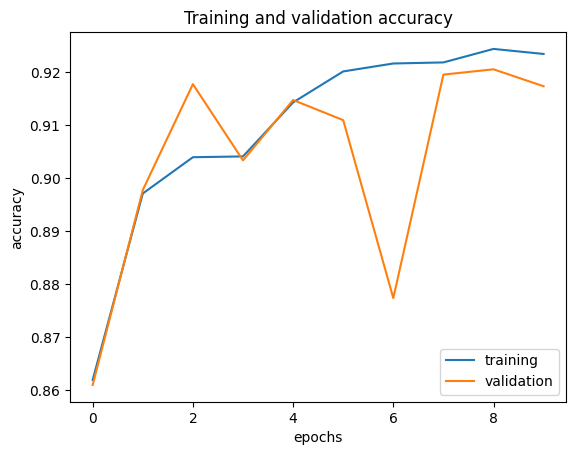

In [18]:
plt.plot(acc, label='training')
plt.plot(val_acc, label='validation')
plt.title('Training and validation accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

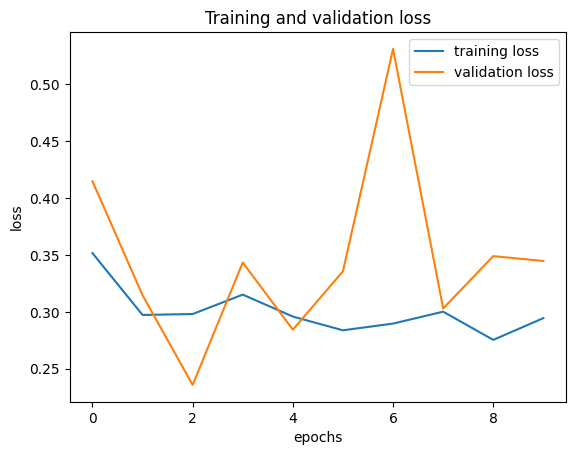

In [19]:
plt.plot(loss, label='training loss')
plt.plot(val_loss, label='validation loss')
plt.title('Training and validation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()